# Implementing Polymorphism

Polimorfizm kelime anlamı olarak aynı şeyin birden fazla farklı durumda bulunmasıdır. Daha çok biyolojide kullanılan bu terim bilgisayar biliminde de kendine yer bulmuş.

In [ ]:
class Rectangle():
    def __init__(self, width=0, height=0):
        self.width = width
        self.height = height
        self.sides = 4

    def getArea(self):
        return (self.width * self.height)


class Circle():
    def __init__(self, radius=0):
        self.radius = radius
        self.sides = 0

    def getArea(self):
        return (self.radius * self.radius * 3.142)

shapes = [Rectangle(6, 10), Circle(7)]
print("Sides of a rectangle are", str(shapes[0].sides))
print("Area of rectangle is:", str(shapes[0].getArea()))

print("Sides of a circle are", str(shapes[1].sides))
print("Area of circle is:", str(shapes[1].getArea()))

Kısac aözetleyelim. İki farklı sınıf ve bu sınıflara ait aynı isimde alan hesaplama methodları. İşte polimorfizim de burada ortaya çıkıyor. Aynı isimde farklı işlemler yapan methodlar.

Sınıfları tanımladıktan sonra yaptığım listeleme işlemi polimorfizimi daha iyi gözlemlenebilmesi için yapılan bir şey. Değişkenleri listeledim ve daha sonra listeden çağırdım. Görünmesini istediğim şey ise ...


```
shapes[0].sides
shapes[1].sides

shapes[0].getArea()
shapes[1].getArea()
```

... aynı isimde farklı işler yapan methodlar.

Inheritance yolu ile aynı işlemi gerçekleştirecek olursak eğer ...


In [ ]:
class Shape:
    def __init__(self): 
        self.sides = 0

    def getArea(self):
        pass

class Rectangle(Shape):
    def __init__(self, width=0, height=0):
        self.width = width
        self.height = height
        self.sides = 4

    def getArea(self):
        return (self.width * self.height)


class Circle(Shape): 
    def __init__(self, radius=0):
        self.radius = radius

    def getArea(self):
        return (self.radius * self.radius * 3.142)


shapes = [Rectangle(6, 10), Circle(7)]
print("Area of rectangle is:", str(shapes[0].getArea()))
print("Area of circle is:", str(shapes[1].getArea()))

# Method Overriding
Geçtiğimi bölümün sonunda yaptığımız, kalıtım yolu ile polimorfizm aslında bu duruma en iyi örnek. Eğer bir alt sınıf, üst sınıflarından birinde önceden tanımlanmış olan bir yöntemin belirli bir uygulamasını sağlıyorsa, yöntemi geçersiz kılma olarak bilinir.

Önceki örnekte, Rectangle ve Circle sınıfları Shape sınıfındaki getArea() yöntemini geçersiz kılıyor.

Bu durumda:

- Üst sınıftaki yönteme geçersiz kılınan yöntem denir.
- Alt sınıflardaki yöntemlere geçersiz kılma yöntemleri denir.

In [ ]:
class Shape:
    def __init__(self): 
        self.sides = 0

    def getArea(self):
        pass


class Rectangle(Shape): 
    def __init__(self, width=0, height=0):
        self.width = width
        self.height = height
        self.sides = 4

    def getArea(self):
        return (self.width * self.height)


class Circle(Shape):  
    def __init__(self, radius=0):
        self.radius = radius

    def getArea(self):
        return (self.radius * self.radius * 3.142)


shapes = [Rectangle(6, 10), Circle(7)]
print("Area of rectangle is:", str(shapes[0].getArea()))
print("Area of circle is:", str(shapes[1].getArea()))

# Operator Overloading

Bu kısım aslında biraz karışık. Şimdi bildiğiniz gibi python'ın kendi içinde programları vardır. Bunların başında `__add__ `fonksiyonu gelir. Bu fonksiyonun özelliği verilen iki değişkeni tiplerine göre toplamasıdır. Mesela ...

In [ ]:
a = 1
b = 2
c = a + b

x = "a"
y = "b"
z = x + y

print(c)
print(z)

3
ab


... örnekte olduğu gibi. Toplama fonksiyonu içine girilen iki değişkene göre toplama yapar ama python bunu sadece sayılar(int, float) ve karakterler(char, string) olarak sınırlı tutar. Bu bölümde biz bu fonksiyona sınıflar ile toplama yapabilecek hale getireceğiz. Mesela aşaığıdaki örnekte de görüldüğü gibi normal şartlarda sınıflarla toplama yapılamaz.

In [ ]:
class Com:
    def __init__(self, real=0, imag=0):
        self.real = real
        self.imag = imag

obj1 = Com(3, 7)
obj2 = Com(2, 5)

obj3 = obj1 + obj2

print(obj3)

TypeError: ignored

Gördüğünüz gibi `TypeError: unsupported operand type(s) for +: 'Com' and 'Com' ` hatasını aldık. Belirtilen işlenen tipleri desteklenmiyor diye. İşte biz bu sorunu ortadan kaldıracağız. Bunu yapma şeklimiz ise daha önce de bahsettiğim `__add__` fonksiyonunu kendi sınıfımız için tekrar programlamaktan geçiyor.

In [ ]:
class Com:
    def __init__(self, real=0, imag=0):
        self.real = real
        self.imag = imag

    # Overloading Add operator
    def __add__(self, other):  
        temp = Com(self.real + other.real, self.imag + other.imag)
        return temp

obj1 = Com(3, 7)
obj2 = Com(2, 5)

obj3 = obj1 + obj2

print("real of obj3:", obj3.real)
print("imag of obj3:", obj3.imag)

Özetleyecek olursak içine iki değer alan bir sınıf: real ve imag.
Daha sonra ise bu sınıfa ait öğelerin toplanması durumunda yapılması gerekneleri bellirtiğim ve Python'un kendi toplama fonksiyonunun ismine sahip bir sınıf methodu oluşturuyorum. Bundan sonra bu sınıfa ait öğeler ile toplama yapıldığında `__add__` fonksiyonu olarak benim sınıf içerisinde belirttiğim methodu çağıracaktır.

**Bu işlemi aşağıda bulunan tüm fonksiyonlar içinde yapabilirsiniz.**

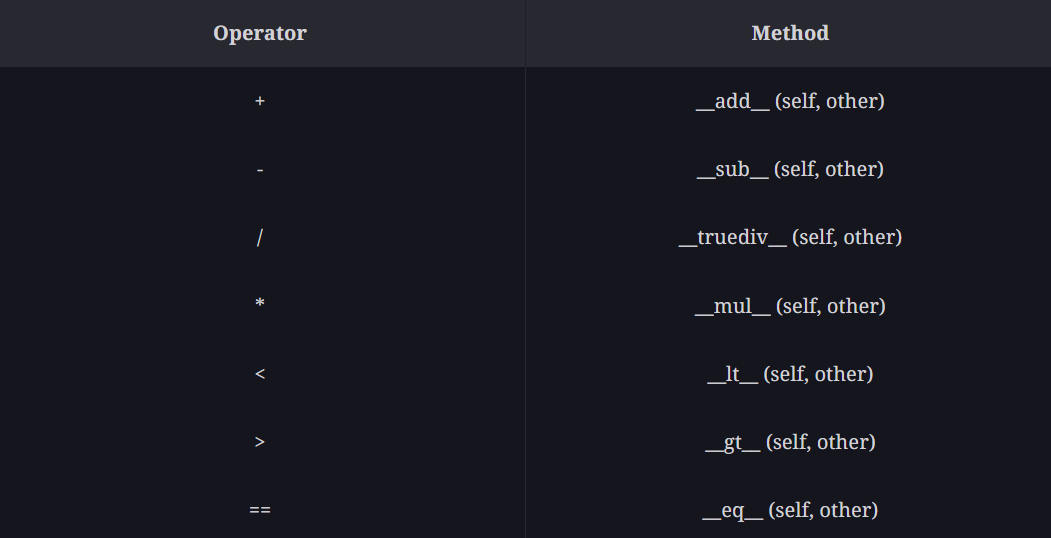